In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

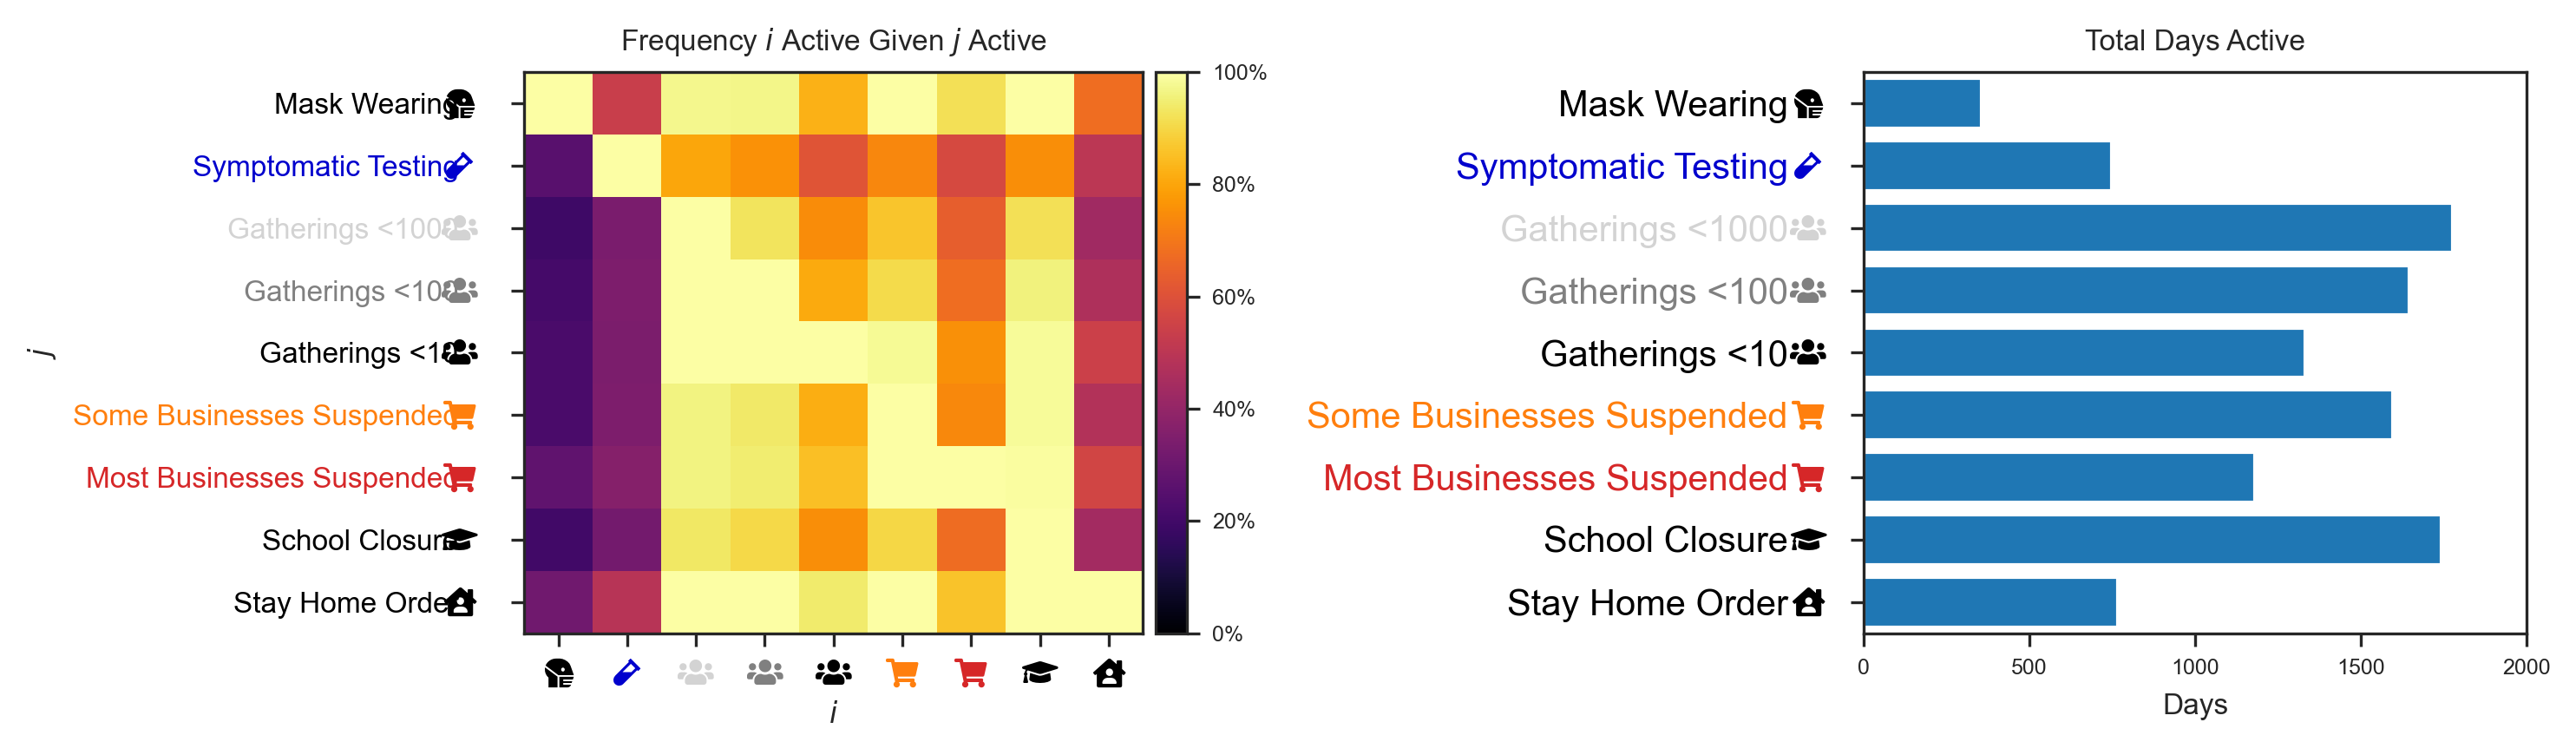

In [4]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]
data.summary_plot(cm_plot_style)

In [8]:
with cm_effect.models.CMCombined_Final(data, cm_plot_style) as model:
    model.build_model()

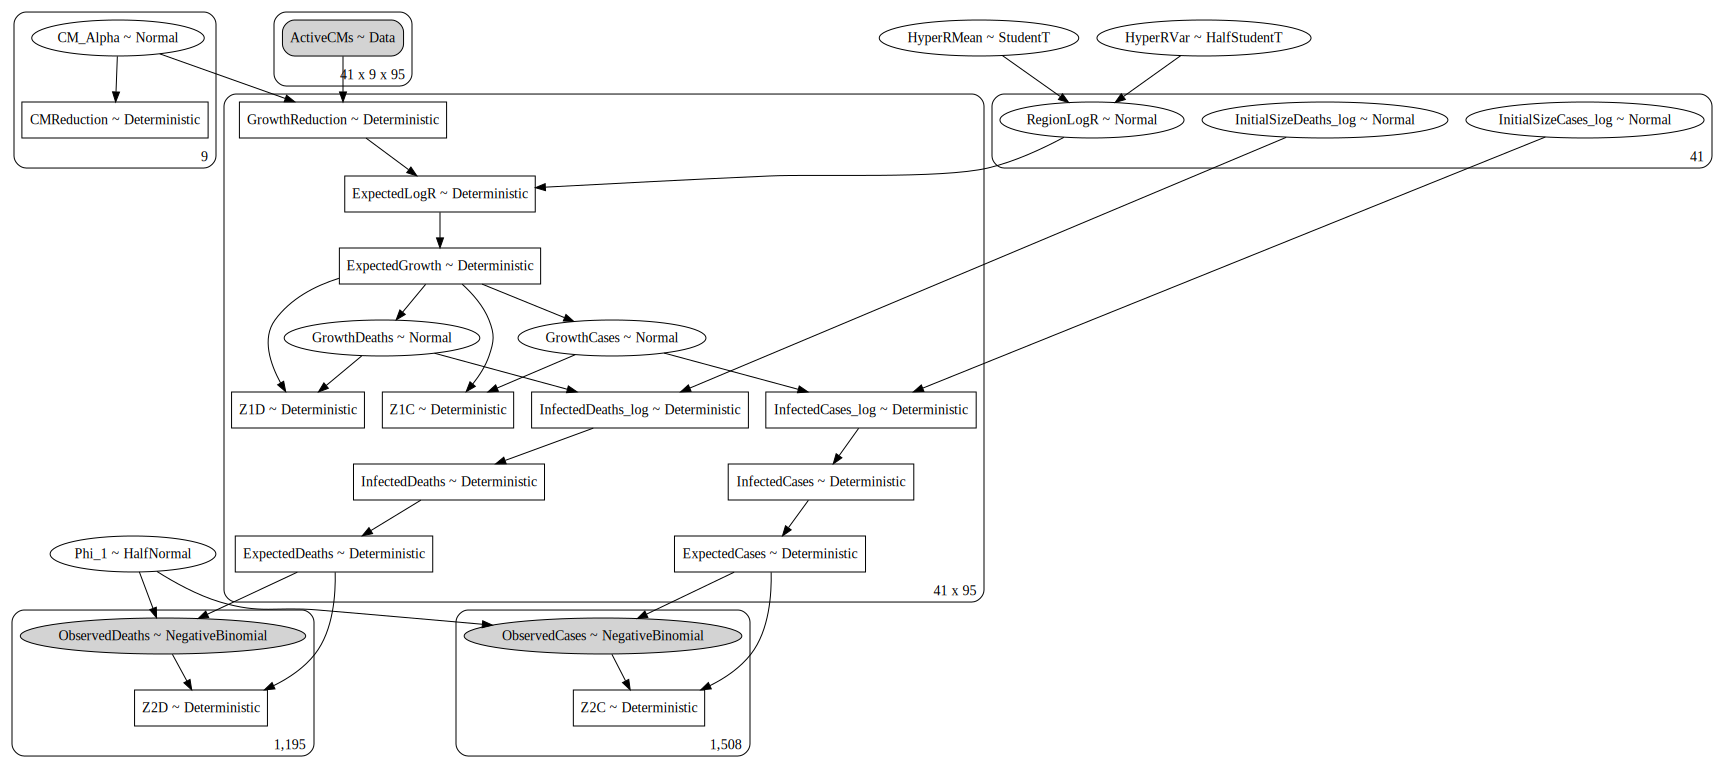

In [32]:
pm.model_to_graphviz(model).render("model-combined-final")
pm.model_to_graphviz(model)

In [33]:
with model.model:
    model.trace = pm.sample(2000, chains=4, cores=4, target_accept=0.975)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, HyperRVar, HyperRMean, CM_Alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [3:38:01<00:00,  1.31s/draws] 
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree dep

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 30-05;15-13


200.0


INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 30-05;15-13


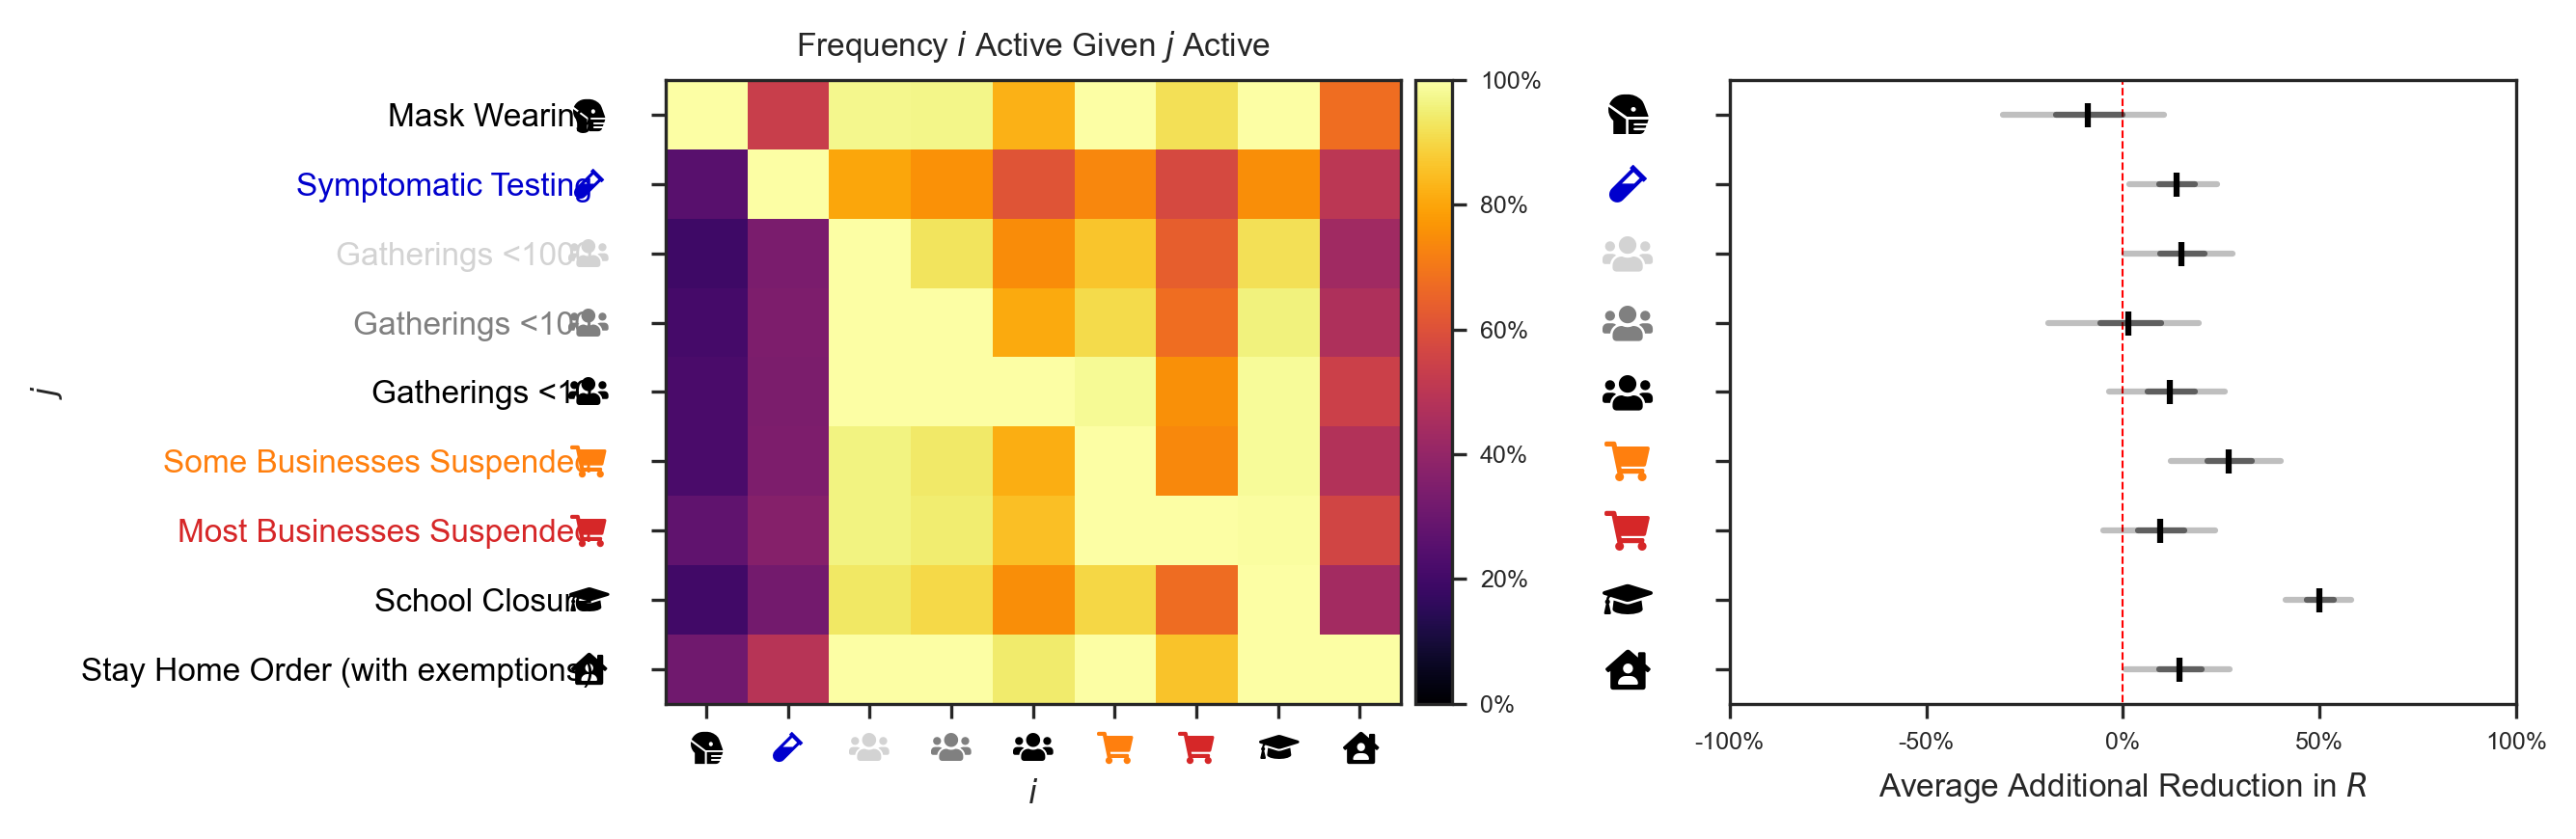

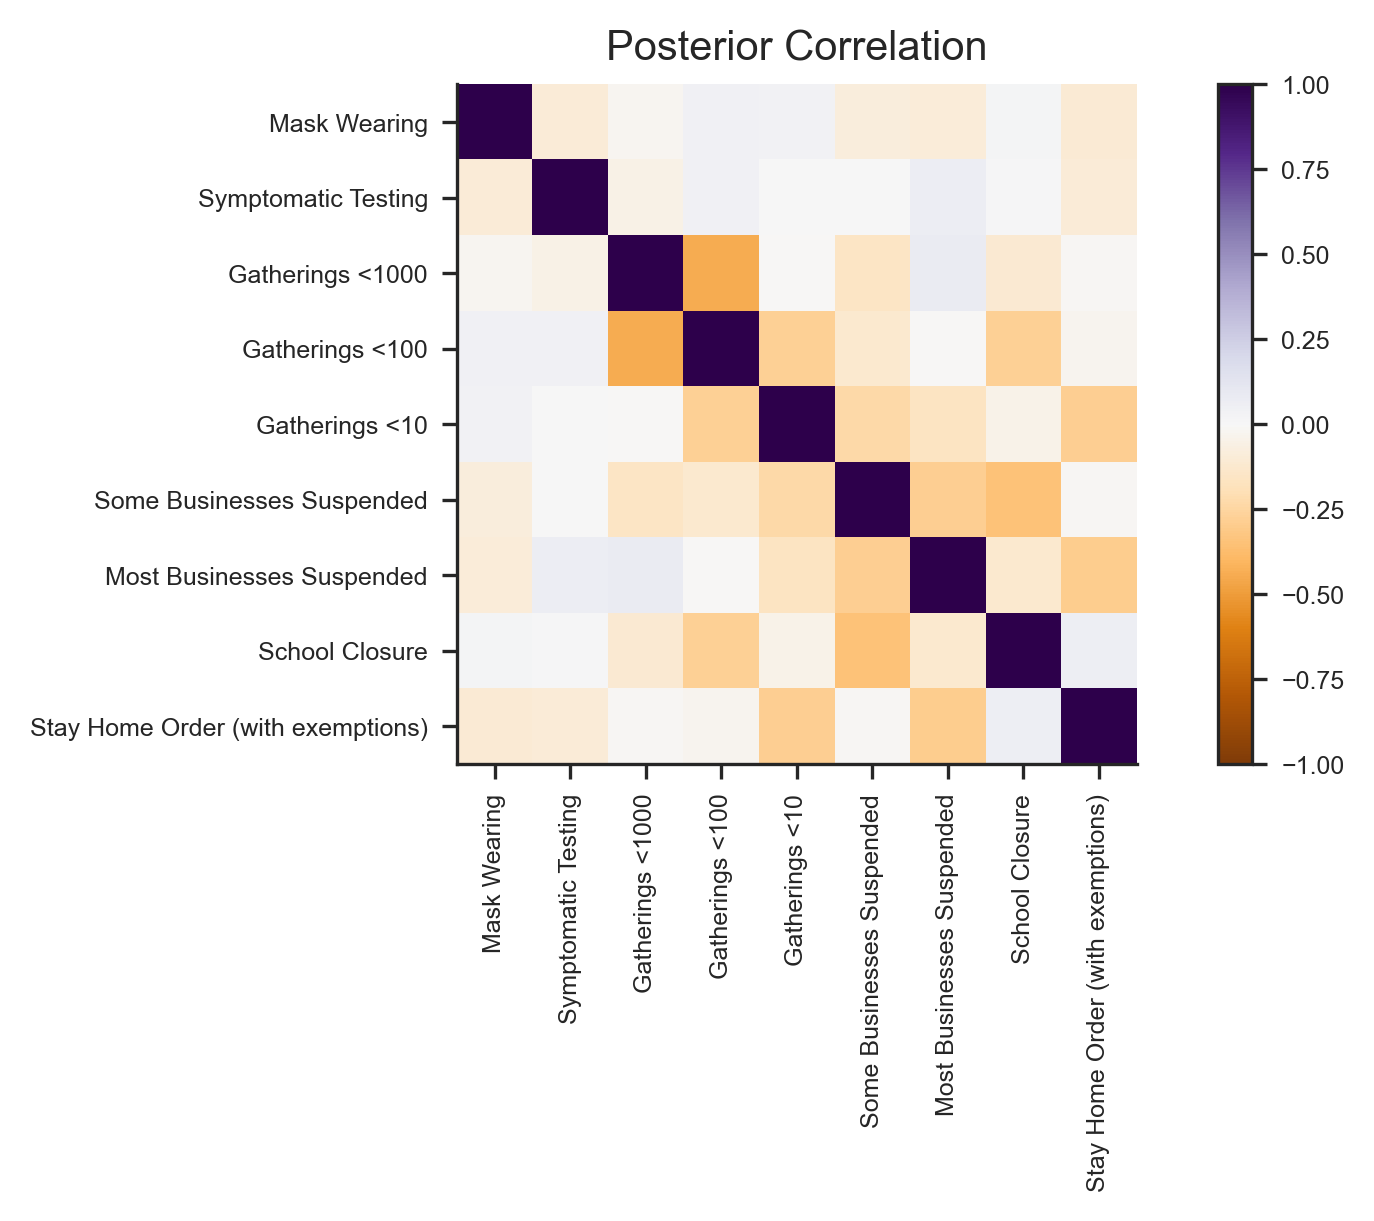

In [34]:
model.plot_effect(model.cm_plot_style)

In [35]:
import pickle

pickle.dump(model.trace, open("baseline.pkl", "wb"))